In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/content/HousingData.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [3]:
df.shape

(506, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [6]:
df=df.dropna()

In [7]:
df.shape

(394, 14)

In [8]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

<Axes: >

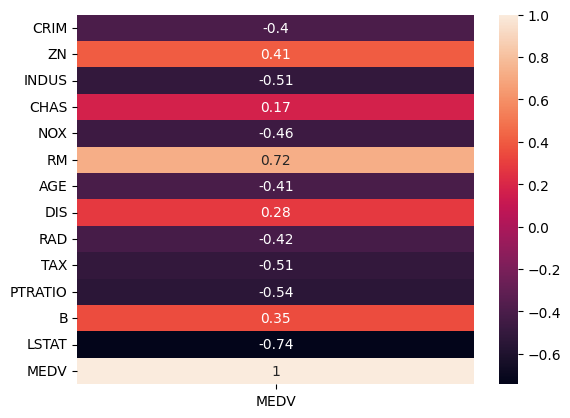

In [9]:
## Find corelation.
corr = df.corr()[['MEDV']]
sns.heatmap(corr, annot=True)

In [10]:
## Independent and dependend features.
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [11]:
X.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [12]:
y

0      24.0
1      21.6
2      34.7
3      33.4
5      28.7
       ... 
499    17.5
500    16.8
502    20.6
503    23.9
504    22.0
Name: MEDV, Length: 394, dtype: float64

In [13]:
## Train test split.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [14]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
421,7.02259,0.0,18.10,0.0,0.718,6.006,95.3,1.8746,24,666,20.2,319.98,15.70
415,18.08460,0.0,18.10,0.0,0.679,6.434,100.0,1.8347,24,666,20.2,27.25,29.05
187,0.07875,45.0,3.44,0.0,0.437,6.782,41.1,3.7886,5,398,15.2,393.87,6.68
387,22.59710,0.0,18.10,0.0,0.700,5.000,89.5,1.5184,24,666,20.2,396.90,31.99
481,5.70818,0.0,18.10,0.0,0.532,6.750,74.9,3.3317,24,666,20.2,393.07,7.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,15.02340,0.0,18.10,0.0,0.614,5.304,97.3,2.1007,24,666,20.2,349.48,24.91
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48
272,0.11460,20.0,6.96,0.0,0.464,6.538,58.7,3.9175,3,223,18.6,394.96,7.73
141,1.62864,0.0,21.89,0.0,0.624,5.019,100.0,1.4394,4,437,21.2,396.90,34.41


In [15]:
## Standardize.
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [16]:
X_train=scaler.fit_transform(X_train)

In [17]:
X_test=scaler.transform(X_test)

In [18]:
import pickle
pickle.dump(scaler,open("scaling.pkl",'wb'))

In [19]:
#Model training
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [20]:
reg.fit(X_train,y_train)

LinearRegression()

In [21]:
reg_pred=reg.predict(X_test)

In [22]:
#MSE
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

24.55864366119114
4.9556678320072205


In [23]:
# Pickling our model.
import pickle

In [24]:
pickle.dump(reg,open('regmodel.pkl','wb'))